# Steganography
This Jupyter Notebook shows how to hide image A under image B. The idea is very simple.  

1. Convert image A from RGB to binary, i.e., a black and white image. For image A, pixel values are just 0 or 1. Now the shape is (width, height).  

2. Convert pixel values of image B to binary numbers. For image B, pixel values are binary numbers within 8 bits. Now the shape is still (width, height, 3).  

3. Choose one channel of image B. Replace the last digit of the pixel values of that channel with the pixel values of A.  

4. Cnvert the binary pixel values of image B back to decimal numbers. And we are done with the encoding part!

As for the decoding part, we can just undo what we have done. Find the channel we have chosen, convert the pixel values of the encoded image to binary numbers, then extract the last digit.  

Note: The decoded image is a black and white image, so there is some information loss.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

This is the private image you want to hide. It is a picture of Ian Goodfellow, father of GANs.

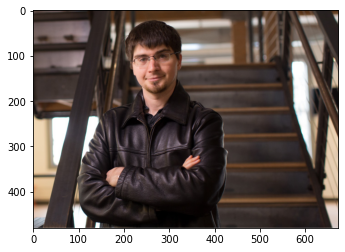

In [0]:
url = 'https://mk0analyticsindf35n9.kinstacdn.com/wp-content/uploads/2019/04/1-5.jpg'
response = requests.get(url)
hidden_img = Image.open(BytesIO(response.content))
plt.imshow(hidden_img);

This is the public image which others can see.

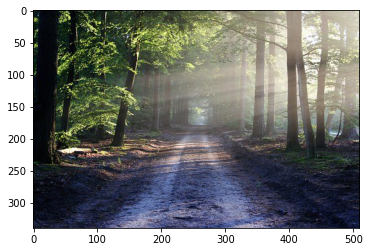

In [0]:
url = 'https://cdn.pixabay.com/photo/2015/06/19/21/24/the-road-815297__340.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img);

## Encoding

In [0]:
def encode(img, hidden_img, channel='R'):
  '''
  img: the public image
  hidden_img: the private image you want to hide
  channel: RGB channel you want to use to hide the image 
  '''
  hidden_img = hidden_img.resize(img.size) # resize hidden_img
  hidden_img = hidden_img.convert('1') # convert to black and white image
  hidden_img = np.array(hidden_img).astype('int') # convert to ndarray

  img = np.array(img).astype('int') # convert to ndarray

  def hide(img, hidden_img):
    img = bin(img) # convert pixel value to binary
    img = img[:-1] + str(hidden_img) # modify the last digit based on hidden_img
    img = int(img, 2) # convert pixel value back
    return img

  hide = np.vectorize(hide) # vectorize the function

  d = {'R':0, 'G':1, 'B':2} # map channel to index
  img[:, :, d[channel]] = hide(img[:, :, d[channel]], hidden_img) # hide the image

  return img

This is the encoded image. As we can see, there is almost no difference with the original image.

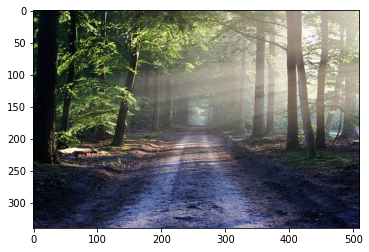

In [0]:
encoded_img = encode(img, hidden_img)
plt.imshow(encoded_img);

## Decoding

In [0]:
def decode(encoded_img, channel='R'):
  '''
  encoded_img: the encoded image which contains a hidden image
  channel: RGB channel which is used to hide the image 
  '''
  def extract(encoded_img):
    encoded_img = bin(encoded_img) # convert pixel value to binary
    return int(encoded_img[-1]) # extract the last digit

  extract = np.vectorize(extract) # vectorize the function

  d = {'R':0, 'G':1, 'B':2} # map channel to index
  decoded_img = extract(encoded_img[:, :, d[channel]]) # extract the image

  return decoded_img

This is the decoded image. The content is the same except that this one is a black and white image.

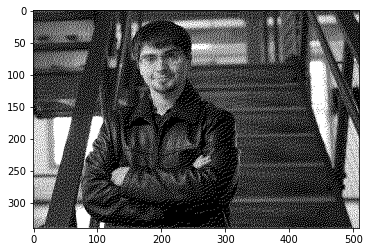

In [0]:
decoded_img = decode(encoded_img)
plt.imshow(decoded_img, cmap='gray');